In [1]:
import numpy as np
import matplotlib.pyplot as plt

The ODE under consideration is $\frac{dy}{dt} = ky$. 

If we replace $y$ with $f_{\theta}(t)$ for a fixed $k$ and train it to satisfy $\frac{df_{\theta}}{dt} = kf_{\theta}$ we now have a mathematical expression for learning a neural surrogate, or solution, to the equation. The network learns to mimic behavior of $y(t) = y_0 e^{kt}$ for a give $k$ and $y_0$.

If we want to learn a neural surrogate that is also considered learning an operator we need to learn $f_{\theta}(t, k)$ or $f_{\theta}(t, k, y_0)$. 
  
$\frac{df_{\theta, k}}{dt} = f_{\theta, k}$ where the input includes the co-efficients of the ODE so that a more general neural surrogate is learns an operator from one function space to another. 

In [3]:
k = 0.1
y0 = 1
t0, tf = 0, 10
dt = 0.1

In [13]:
def euler_method(k, y0, t0, tf, dt):
    t = np.arange(t0, tf, dt)
    y = np.zeros(t.shape)
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = y[i-1] + dt * k * y[i-1]
    return t, y

In [14]:
t_euler, y_euler = euler_method(k, y0, t0, tf, dt)

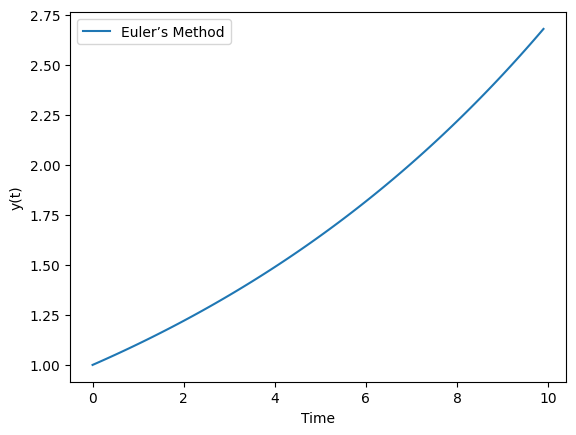

In [16]:
plt.plot(t_euler, y_euler, label='Euler’s Method')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

Epoch 0, Loss: 5.288270473480225
Epoch 100, Loss: 0.00010065068636322394
Epoch 200, Loss: 4.8601646994939074e-05
Epoch 300, Loss: 4.3486961658345535e-05
Epoch 400, Loss: 3.9488695620093495e-05
Epoch 500, Loss: 3.546581501723267e-05
Epoch 600, Loss: 3.2433064916403964e-05
Epoch 700, Loss: 3.0021776183275506e-05
Epoch 800, Loss: 2.7431784474174492e-05
Epoch 900, Loss: 2.5639727027737536e-05


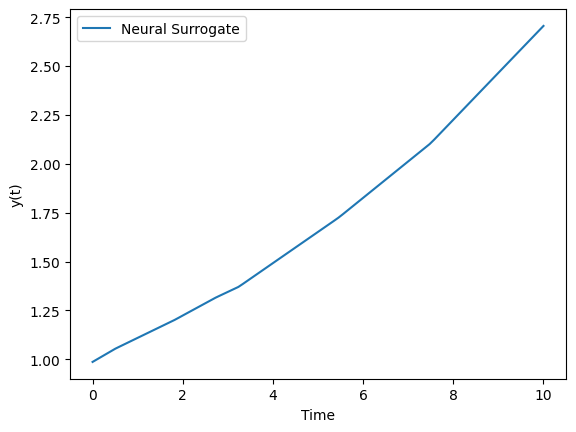

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

t_tensor = torch.linspace(t0, tf, steps=int((tf-t0)/dt)).unsqueeze(-1)
y_true = y0 * torch.exp(k * t_tensor)

model = nn.Sequential(
    nn.Linear(1, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
for epoch in range(1000):
    optimizer.zero_grad()
    y_pred = model(t_tensor)
    loss = criterion(y_pred, y_true)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

with torch.no_grad():
    y_pred = model(t_tensor).numpy()
plt.plot(t_tensor.numpy(), y_pred, label='Neural Surrogate')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

In [20]:
import torch
import numpy as np
k_values = torch.tensor([0.1, 0.2])
t_grid = torch.linspace(t0, tf, steps=int((tf - t0) / dt))
y_true = torch.tensor([y0 * torch.exp(tk[1] * tk[0]) for tk in tk_pairs])
y_true = y_true.unsqueeze(1)
model = ODE_Operator_Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
tk_pairs = tk_pairs.float()
for epoch in range(1000):
    optimizer.zero_grad()
    y_pred = model(tk_pairs)
    loss = criterion(y_pred, y_true)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 7.869067192077637
Epoch 100, Loss: 0.9723403453826904
Epoch 200, Loss: 0.4119742214679718
Epoch 300, Loss: 0.020008418709039688
Epoch 400, Loss: 0.007057486101984978
Epoch 500, Loss: 0.003839375451207161
Epoch 600, Loss: 0.0020619425922632217
Epoch 700, Loss: 0.0013188192388042808
Epoch 800, Loss: 0.0009625655366107821
Epoch 900, Loss: 0.0007174246711656451


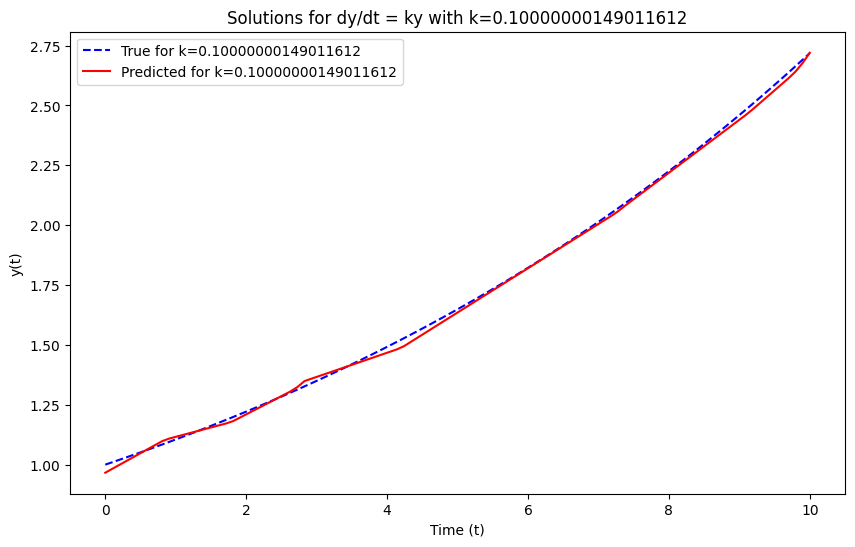

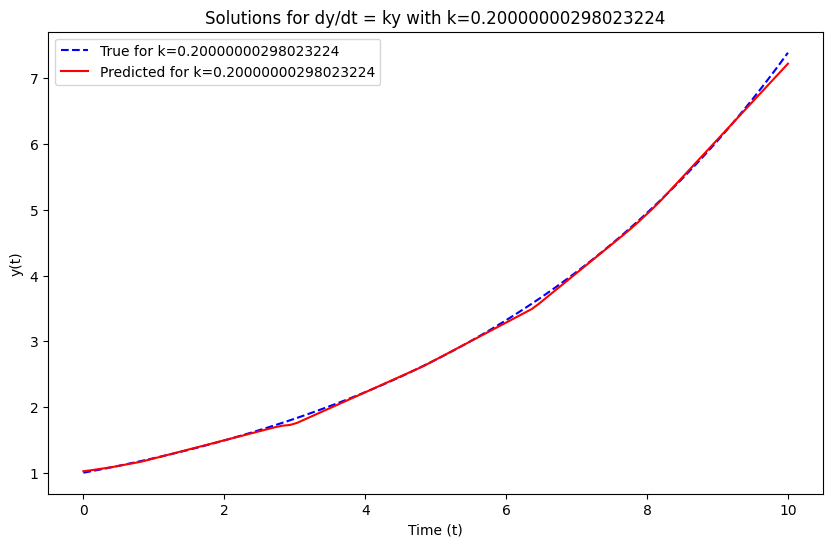

In [21]:
with torch.no_grad():
    y_pred = model(tk_pairs.float()).numpy()
y_true_np = y_true.numpy()
for i, k in enumerate(k_values):
    t_vals = t_grid.numpy()
    y_true_for_k = y_true_np[i*len(t_grid):(i+1)*len(t_grid)]
    y_pred_for_k = y_pred[i*len(t_grid):(i+1)*len(t_grid)]
    plt.figure(figsize=(10, 6))
    plt.plot(t_vals, y_true_for_k, label=f'True for k={k.item()}', color='blue', linestyle='dashed')
    plt.plot(t_vals, y_pred_for_k, label=f'Predicted for k={k.item()}', color='red')
    plt.title(f'Solutions for dy/dt = ky with k={k.item()}')
    plt.xlabel('Time (t)')
    plt.ylabel('y(t)')
    plt.legend()
    plt.show()

# Gemini

In [16]:
import numpy as np

def eulers_method(f, y0, x_range, step_size):
    """
    f: the derivative function (dy/dx)
    y0: initial value
    x_range: tuple for the start and end of the x values
    step_size: size of the steps to take
    """
    x_values = np.arange(x_range[0], x_range[1], step_size)
    y_values = np.zeros_like(x_values)
    y_values[0] = y0

    for i in range(1, len(x_values)):
        y_values[i] = y_values[i - 1] + step_size * f(x_values[i - 1], y_values[i - 1])

    return x_values, y_values

# Specify the ODE
def f(x, y):
    return -y

# Parameters
y0 = 1
x_range = (0, 2) 
step_size = 0.02

# Solve using Euler's method
x_euler, y_euler = eulers_method(f, y0, x_range, step_size) 

In [19]:
import numpy as np
import torch
import torch.nn as nn

class ODESurrogate(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 20),  # Increased width of layer
            nn.Tanh(),
            nn.Linear(20, 20),  # Added an extra hidden layer
            nn.Tanh(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.net(x)
x_data = torch.linspace(0, 2, 20)[:, None]  # Column vector 
y_data = torch.exp(-x_data)  
model = ODESurrogate()
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()  
for _ in range(1000):  
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

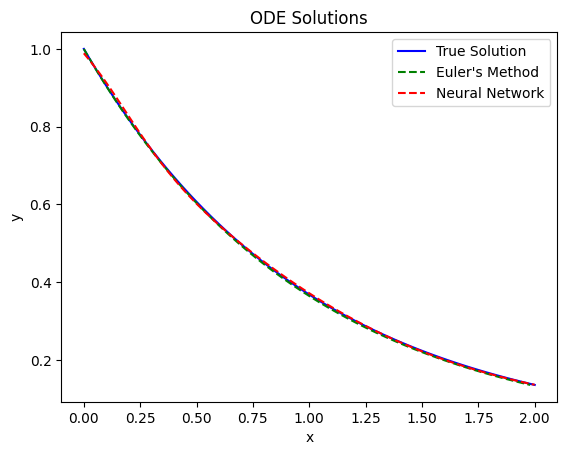

In [20]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

def true_solution(x):
    return np.exp(-x)
x_plot = np.linspace(0, 2, 100)
y_true = true_solution(x_plot)
plt.plot(x_plot, y_true, 'b', label='True Solution')
plt.plot(x_euler, y_euler, 'g--', label="Euler's Method")
x_nn = torch.tensor(x_plot[:, None], dtype=torch.float)  # Convert to tensor
y_nn = model(x_nn).detach().numpy()
plt.plot(x_plot, y_nn, 'r--', label='Neural Network')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('ODE Solutions')
plt.show()